# Descriptive Analysis of the datasets

## Imports

In [1]:
pip install -r "../requirements.txt"

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# load_dotenv()

## Dataset 1: UJIIndoorLoc
QUOTE:
"""
Many real world applications need to know the localization of a user in the world to provide their services. Therefore, automatic user localization has been a hot research topic in the last years. Automatic user localization consists of estimating the position of the user (latitude, longitude and altitude) by using an electronic device, usually a mobile phone. Outdoor localization problem can be solved very accurately thanks to the inclusion of GPS sensors into the mobile devices. However, indoor localization is still an open problem mainly due to the loss of GPS signal in indoor environments. Although, there are some indoor positioning technologies and methodologies, this database is focused on WLAN fingerprint-based ones (also know as WiFi Fingerprinting).

Although there are many papers in the literature trying to solve the indoor localization problem using a WLAN fingerprint-based method, there still exists one important drawback in this field which is the lack of a common database for comparison purposes. So, UJIIndoorLoc database is presented to overcome this gap. We expect that the proposed database will become the reference database to compare different indoor localization methodologies based on WiFi fingerprinting.

The UJIIndoorLoc database covers three buildings of Universitat Jaume I with 4 or more floors and almost 110.000m2. It can be used for classification, e.g. actual building and floor identification, or regression, e.g. actual longitude and latitude estimation. It was created in 2013 by means of more than 20 different users and 25 Android devices. The database consists of 19937 training/reference records (trainingData.csv file) and 1111 validation/test records (validationData.csv file).

The 529 attributes contain the WiFi fingerprint, the coordinates where it was taken, and other useful information.

Each WiFi fingerprint can be characterized by the detected Wireless Access Points (WAPs) and the corresponding Received Signal Strength Intensity (RSSI). The intensity values are represented as negative integer values ranging -104dBm (extremely poor signal) to 0dbM. The positive value 100 is used to denote when a WAP was not detected. During the database creation, 520 different WAPs were detected. Thus, the WiFi fingerprint is composed by 520 intensity values.

Then the coordinates (latitude, longitude, floor) and Building ID are provided as the attributes to be predicted. 

Additional information has been provided.

The particular space (offices, labs, etc.) and the relative position (inside/outside the space) where the capture was taken have been recorded. Outside means that the capture was taken in front of the door of the space.

Information about who (user), how (android device & version) and when (timestamp) WiFi capture was taken is also recorded."""


In [ ]:
folder_path = '../datasets/UJIIndoorLoc/'
UJI_training_file = folder_path + 'trainingData.csv'
UJI_validation_file = folder_path + 'validationData.csv'
UJI_training = pd.read_csv(UJI_training_file)
UJI_validation = pd.read_csv(UJI_validation_file)
UJI_training.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
print(f"There are {UJI_training.shape[0]} instances in the training set and {UJI_validation.shape[0]} in the validation/testing set.")

There are 19937 instances in the training set and 1111 in the validation/testing set.


In [5]:
#Nr of Wifi Access Points
WAP_columns = [col for col in UJI_training.columns if col.startswith('WAP')]
print("There are", len(WAP_columns), "Wifi Access Points")
print(f"There are {UJI_training.shape[1]} features in the dataset. The first {len(WAP_columns)} are the Wifi Access Points (WAPs), labeled WAP001 to WAP520. The remaining features are: Longitude, Latitude, Floor, BuildingID, SpaceID, RelativePosition, UserID, PhoneID, and Timestamp.")

There are 520 Wifi Access Points
There are 529 features in the dataset. The first 520 are the Wifi Access Points (WAPs), labeled WAP001 to WAP520. The remaining features are: Longitude, Latitude, Floor, BuildingID, SpaceID, RelativePosition, UserID, PhoneID, and Timestamp.


In [6]:
print(f"There are {UJI_training.isnull().sum().sum()} missing values in the training set and {UJI_validation.isnull().sum().sum()} in the validation/testing set.")

There are 0 missing values in the training set and 0 in the validation/testing set.


<Axes: xlabel='PHONEID'>

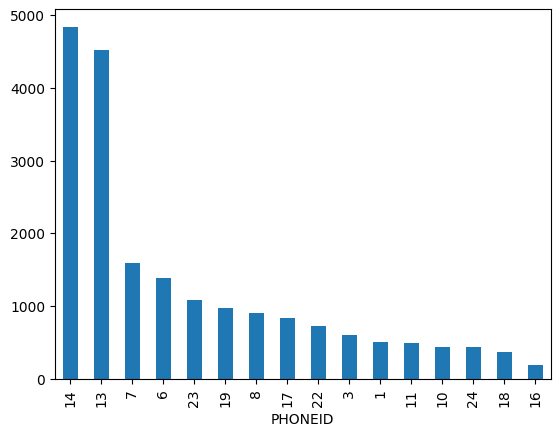

In [7]:
UJI_training["PHONEID"].value_counts().plot(kind='bar')

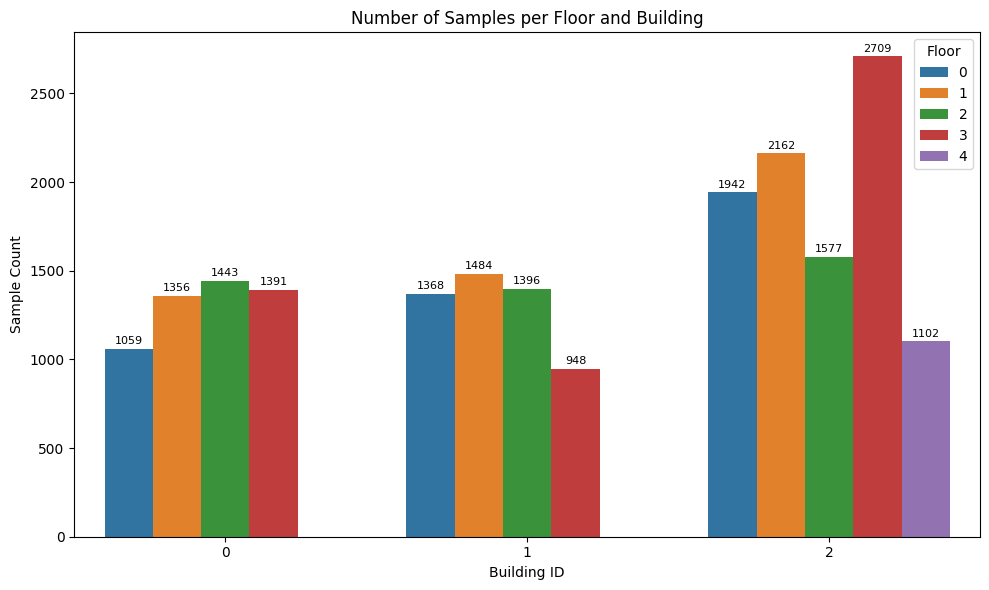

In [33]:
building_counts = UJI_training['BUILDINGID'].unique()
floors_per_building = UJI_training.groupby('BUILDINGID')['FLOOR'].unique()

floor_counts = UJI_training.groupby(['BUILDINGID', 'FLOOR']).size()

floor_counts_dict = {}
for building in floor_counts.index.levels[0]:
    floor_counts_dict[building] = {}
    for floor in floor_counts[building].index:
        count = floor_counts[building][floor]
        floor_counts_dict[building][floor] = int(count)  

records = [
    {"BUILDINGID": b, "FLOOR": f, "count": c}
    for b, floors in floor_counts_dict.items()
    for f, c in floors.items()
]
floor_df = pd.DataFrame(records)


floor_df['BUILDINGID'] = floor_df['BUILDINGID'].astype(int)
floor_df['FLOOR'] = floor_df['FLOOR'].astype(int)

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=floor_df, x='BUILDINGID', y='count', hue='FLOOR', palette='tab10')
ax.set_title('Number of Samples per Floor and Building')
ax.set_xlabel('Building ID')
ax.set_ylabel('Sample Count')

for container in ax.containers:
    ax.bar_label(container, padding=2, fontsize=8)

ax.legend(title='Floor', frameon=True)
plt.tight_layout()
plt.show()


### Spaces

In [9]:
print("There are", UJI_training["SPACEID"].nunique(), "unique space IDs.")

There are 123 unique space IDs.


Text(0.5, 1.0, 'Number of Unique Spaces per Building')

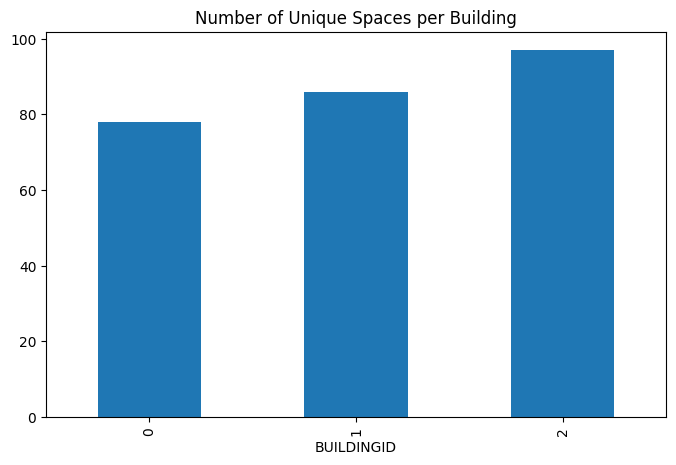

In [10]:
unique_spaces_per_building = UJI_training.groupby(['BUILDINGID'])['SPACEID'].nunique()
#barplot
unique_spaces_per_building.plot(kind='bar', figsize=(8, 5))
plt.title('Number of Unique Spaces per Building')

In [11]:
print(f"There are {UJI_training.groupby(['BUILDINGID', 'FLOOR', 'SPACEID'])['SPACEID'].nunique().sum()} unique spaces in the training set, which is more than the 123 unique spaceIDs, because some spaceIDs are present in multiple buildings and multiple floors!.")

There are 735 unique spaces in the training set, which is more than the 123 unique spaceIDs, because some spaceIDs are present in multiple buildings and multiple floors!.


In [12]:
UJI_training_positions_df = UJI_training[['BUILDINGID', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'SPACEID']]

In [13]:
UJI_training_positions_df.head()

,BUILDINGID,LONGITUDE,LATITUDE,FLOOR,SPACEID
0,1,-7541.2643,4.864921e+06,2,106
1,1,-7536.6212,4.864934e+06,2,106
2,1,-7519.1524,4.864950e+06,2,103
3,1,-7524.5704,4.864934e+06,2,102
4,0,-7632.1436,4.864982e+06,0,122


In [14]:
print("There are also spaceIDs that are present in multiple floors, e.g. spaceID 106 is present on floor 2 and floor 3 in building 0:")
UJI_training_positions_df[UJI_training_positions_df['SPACEID'] == 106]

There are also spaceIDs that are present in multiple floors, e.g. spaceID 106 is present on floor 2 and floor 3 in building 0:


,BUILDINGID,LONGITUDE,LATITUDE,FLOOR,SPACEID
0,1,-7541.2643,4.864921e+06,2,106
1,1,-7536.6212,4.864934e+06,2,106
108,1,-7536.6212,4.864934e+06,2,106
112,1,-7541.2643,4.864921e+06,2,106
219,1,-7541.2643,4.864921e+06,2,106
...,...,...,...,...,...
19721,1,-7559.6375,4.864872e+06,3,106
19765,1,-7559.6375,4.864872e+06,3,106
19805,1,-7559.6375,4.864872e+06,3,106
19850,1,-7559.6375,4.864872e+06,3,106


In [32]:
spaces_df = UJI_training_positions_df.drop_duplicates(subset=['BUILDINGID', 'FLOOR', 'SPACEID'])
# spaces_df = UJI_training_positions_df
spaces_df = spaces_df.sort_values(by=['BUILDINGID', 'FLOOR', 'SPACEID'])
min_longitude = spaces_df['LONGITUDE'].min()
max_longitude = spaces_df['LONGITUDE'].max()
min_latitude = spaces_df['LATITUDE'].min()
max_latitude = spaces_df['LATITUDE'].max()
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}


In [16]:
spaces_df['MAX_LONGITUDE'] = UJI_training.groupby(['BUILDINGID', 'FLOOR', 'SPACEID'])['LONGITUDE'].max().values
spaces_df['MIN_LONGITUDE'] = UJI_training.groupby(['BUILDINGID', 'FLOOR', 'SPACEID'])['LONGITUDE'].min().values
spaces_df['MAX_LATITUDE'] = UJI_training.groupby(['BUILDINGID', 'FLOOR', 'SPACEID'])['LATITUDE'].max().values
spaces_df['MIN_LATITUDE'] = UJI_training.groupby(['BUILDINGID', 'FLOOR', 'SPACEID'])['LATITUDE'].min().values
# spaces_df.drop(columns=['LONGITUDE', 'LATITUDE'], inplace=True)


[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),

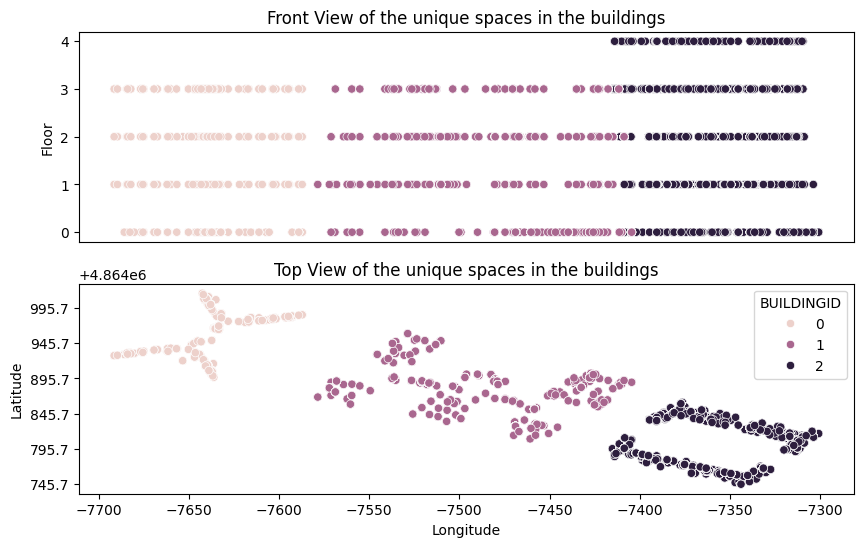

In [36]:
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))
# Plot 1: Scatter x: Longitude, y: Floor, color: BuildingID
sns.scatterplot(
    data=UJI_training,
    x='LONGITUDE',
    y='FLOOR',
    hue='BUILDINGID',
    ax=axs[0],
    legend=False
)
axs[0].set_title('Front View of the unique spaces in the buildings')
axs[0].set(xlabel=None, ylabel='Floor', yticks=range(0, 5), xticks=[])
# Plot 2: Scatter x: Longitude, y: Latitude, color: BuildingID, shape: Floor
sns.scatterplot(
    data=UJI_training,
    x='LONGITUDE',
    y='LATITUDE',
    hue='BUILDINGID',
    ax=axs[1]
)
axs[1].set_title('Top View of the unique spaces in the buildings')
axs[1].set(xlabel='Longitude', ylabel='Latitude', yticks=np.arange(min_latitude, max_latitude, step=50))


In [31]:
np.arange(min_latitude, max_latitude, step=0.001)

array([4864745.74501597, 4864745.74601597, 4864745.74701597, ...,
       4865016.68506038, 4865016.68606038, 4865016.68706038],
      shape=(270943,))

In [13]:
unique_spaces_per_building = UJI_training_positions_df.groupby('BUILDINGID')["SPACEID"].unique()

In [17]:
spaces_dict = {}
for bID, spaces in unique_spaces_per_building.items():
    for space in spaces:
        if space not in spaces_dict.keys():
            spaces_dict[space] = []
        spaces_dict[space].append(bID)
print(spaces_dict)


{np.int64(122): [0, 1, 2], np.int64(102): [0, 1, 2], np.int64(110): [0, 1, 2], np.int64(111): [0, 1, 2], np.int64(107): [0, 1, 2], np.int64(106): [0, 1, 2], np.int64(115): [0, 1, 2], np.int64(114): [0, 1, 2], np.int64(113): [0, 1, 2], np.int64(112): [0, 1, 2], np.int64(116): [0, 1, 2], np.int64(120): [0, 2], np.int64(119): [0, 1, 2], np.int64(117): [0, 1, 2], np.int64(118): [0, 1, 2], np.int64(121): [0, 1, 2], np.int64(123): [0, 2], np.int64(125): [0, 2], np.int64(126): [0, 2], np.int64(129): [0, 2], np.int64(127): [0, 2], np.int64(128): [0, 2], np.int64(133): [0, 2], np.int64(131): [0, 2], np.int64(130): [0, 2], np.int64(134): [0, 2], np.int64(132): [0, 2], np.int64(236): [0, 2], np.int64(201): [0, 1, 2], np.int64(208): [0, 1, 2], np.int64(202): [0, 1, 2], np.int64(212): [0, 1, 2], np.int64(214): [0, 1, 2], np.int64(209): [0, 1, 2], np.int64(211): [0, 1, 2], np.int64(213): [0, 1, 2], np.int64(237): [0, 1, 2], np.int64(216): [0, 1, 2], np.int64(215): [0, 1, 2], np.int64(218): [0, 1, 2]

In [ ]:
unique_spaces_per_building[0]

array([122, 102, 110, 111, 107, 106, 115, 114, 113, 112, 116, 120, 119,
       117, 118, 121, 123, 125, 126, 129, 127, 128, 133, 131, 130, 134,
       132, 236, 201, 208, 202, 212, 214, 209, 211, 213, 237, 216, 215,
       218, 234, 220, 219, 235, 233, 231, 232, 230, 222, 225, 229, 227,
       224, 210, 205, 206, 204, 207, 203, 217, 221, 226, 223, 228, 138,
       101, 124, 103, 105, 109, 108, 140, 139, 104, 241, 137, 135, 136])

In [33]:
unique_spaces_per_building[1]

array([106, 103, 102, 105, 101, 112, 104, 110, 108, 109, 111, 107,  15,
        29, 117,  16,  28,  22,  10,   2,   4,   3,   5,   6,   9,  27,
         8,   7,  26,  18, 216,  17, 217, 202, 203, 248, 247, 222, 213,
       244, 243, 245, 246, 249, 237, 227, 228, 230, 229, 238, 231, 235,
       239, 215, 210, 209, 201, 207, 208, 204, 206, 205, 116, 113, 211,
       212, 214, 115, 121, 119, 118, 122, 114,   1,  30,  25,  13,  12,
       218, 219, 220, 225, 224, 226,  11,  14])

In [35]:
unique_spaces_per_building[2]

array([247, 248, 246, 245, 244, 243, 242, 241, 240, 201, 202, 204, 203,
       205, 207, 206, 209, 211, 208, 210, 212, 214, 213, 216, 217, 215,
       121, 219, 221, 222, 218, 220, 250, 223, 225, 224, 229, 226, 227,
       228, 233, 231, 230, 232, 236, 235, 234, 237, 238, 239, 141, 102,
       140, 143, 101, 103, 105, 111, 106, 104, 108, 107, 112, 113, 109,
       114, 116, 117, 115, 110, 120, 118, 128, 119, 129, 122, 125, 124,
       131, 127, 132, 126, 133, 134, 137, 135, 136, 253, 254, 123, 130,
       138, 139, 142, 146, 147, 144])

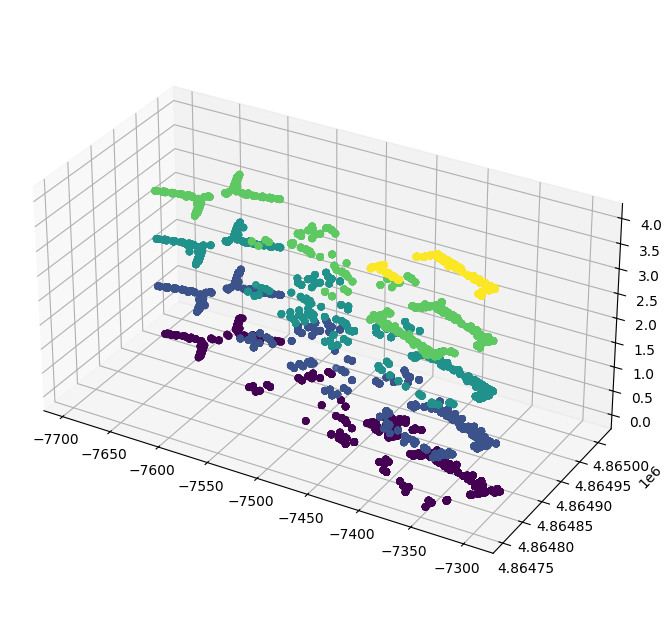

In [25]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    UJI_training_positions_df['LONGITUDE'],
    UJI_training_positions_df['LATITUDE'],
    UJI_training_positions_df['FLOOR'],
    c=UJI_training_positions_df['FLOOR'],
    
)
ax.set_box_aspect([1, 0.5, 0.5])

## Dataset 2: Myocardial infarction complications

### Summary
QUOTE:
"Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient (i) at the time of admission and (ii) on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping). 
MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million people suffer from MI every year, and 200-300 thousand of them die from acute MI before arriving at the hospital.
The course of the disease in patients with MI is different. MI can occur without complications or with complications that do not worsen the long-term prognosis. At the same time, about half of patients in the acute and subacute periods have complications that lead to worsening of the disease and even death. Even an experienced specialist can not always foresee the development of these complications. In this regard, predicting complications of myocardial infarction in order to timely carry out the necessary preventive measures is an important task.

Problems to solve
In general columns 2-112 can be used as input data for prediction. Possible complications (outputs) are listed in columns 113-124.
There are four possible time moments for complication prediction: on base of the information known at
1.	the time of admission to hospital: all input columns (2-112) except 93, 94, 95, 100, 101, 102, 103, 104, 105 can be used for prediction;
2.	the end of the first day (24 hours after admission to the hospital): all input columns (2-112) except 94, 95, 101, 102, 104, 105 can be used for prediction;
3.	the end of the second day (48 hours after admission to the hospital) all input columns (2-112) except 95, 102, 105 can be used for prediction;
4.	the end of the third day (72 hours after admission to the hospital) all input columns (2-112) can be used for prediction.

You can find detailed description of database, descriptive statistics and csv version of database in DOI: 10.25392/leicester.data.12045261.v3 " (Source)[https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications]

In [61]:
import json

In [56]:
from ucimlrepo import fetch_ucirepo 

# fetch dataset
mi_complications = fetch_ucirepo(id=579)

# data (as pandas dataframes)
mi_features = mi_complications.data.features
mi_targets = mi_complications.data.targets

mi_metadata = mi_complications.metadata
mi_variables = mi_complications.variables


In [62]:
#store metadata as json
with open('../datasets/MI/mi_metadata.json', 'w') as f:
    json.dump(mi_metadata, f, indent=4)

In [63]:
#read metadata from json
with open('../datasets/MI/mi_metadata.json', 'r') as f:
    mi_metadata = json.load(f)

In [66]:
mi_features.to_csv('../datasets/MI/mi_features.csv')
mi_targets.to_csv('../datasets/MI/mi_targets.csv')
mi_variables.to_csv('../datasets/MI/mi_variables.csv')

In [65]:
print(mi_metadata["additional_info"]["summary"])

Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient (i) at the time of admission and (ii) on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping). 
MI is one of the most challenging problems of modern medicine. Acute myocardial infarction is associated with high mortality in the first year after it. The incidence of MI remains high in all countries. This is especially true for the urban population of highly developed countries, which is exposed to chronic stress factors, irregular and not always balanced nutrition. In the United States, for example, more than a million p

In [67]:
mi_features = pd.read_csv('../datasets/MI/mi_features.csv', index_col=0)
mi_targets = pd.read_csv('../datasets/MI/mi_targets.csv', index_col=0)
mi_variables = pd.read_csv('../datasets/MI/mi_variables.csv', index_col=0)

In [40]:
print(f"""
Dataset Name:          {mi_metadata.name}
Abstract:              {mi_metadata.abstract}
Area:                  {mi_metadata.area}
Task:                  {mi_metadata.tasks[0]}
Last updated:          {mi_metadata.last_updated}
Has missing values:    {mi_metadata.has_missing_values}
Number of Instances:   {mi_metadata.num_instances}
Number of Features:    {mi_metadata.num_features}
Number of Targets:     {len(mi_metadata.target_col)}
""")


Dataset Name:          Myocardial infarction complications
Abstract:              Prediction of myocardial infarction complications
Area:                  Health and Medicine
Task:                  Classification
Last updated:          Fri Nov 03 2023
Has missing values:    yes
Number of Instances:   1700
Number of Features:    111
Number of Targets:     12



### Target Variables

In [41]:
mi_variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,Record ID (ID): Unique identifier. Cannot be r...,None,no
1,AGE,Feature,Integer,Age,Age of patient.,None,no
2,SEX,Feature,Binary,Sex,"0: female, 1: male",None,no
3,INF_ANAM,Feature,Categorical,None,Quantity of myocardial infarctions in the anam...,None,yes
4,STENOK_AN,Feature,Categorical,None,Exertional angina pectoris in the anamnesis. \...,None,yes
...,...,...,...,...,...,...,...
119,DRESSLER,Target,Binary,None,Dressler syndrome,None,no
120,ZSN,Target,Binary,None,Chronic heart failure,None,no
121,REC_IM,Target,Binary,None,Relapse of the myocardial infarction,None,no
122,P_IM_STEN,Target,Binary,None,Post-infarction angina,None,no


In [42]:
mi_target_variables = mi_variables[mi_variables['role'].str.lower() == 'target'].copy()
mi_target_variables.set_index('name', inplace=True)

In [43]:
mi_target_variables

,role,type,demographic,description,units,missing_values
name,,,,,,
FIBR_PREDS,Target,Binary,None,Atrial fibrillation,None,no
PREDS_TAH,Target,Binary,None,Supraventricular tachycardia,None,no
JELUD_TAH,Target,Binary,None,Ventricular tachycardia,None,no
FIBR_JELUD,Target,Binary,None,Ventricular fibrillation,None,no
A_V_BLOK,Target,Binary,None,Third-degree AV block,None,no
OTEK_LANC,Target,Binary,None,Pulmonary edema,None,no
RAZRIV,Target,Binary,None,Myocardial rupture,None,no
DRESSLER,Target,Binary,None,Dressler syndrome,None,no
ZSN,Target,Binary,None,Chronic heart failure,None,no


In [44]:
mi_target_variables["count"] = 0
for i in mi_target_variables.index:
    if mi_target_variables.loc[i, "type"].lower() == 'binary':
        mi_target_variables.loc[i, "count"] = mi_targets[i].sum()
    else:
        mi_target_variables.loc[i, "count"] = mi_targets[i].count()

In [45]:
mi_target_variables

,role,type,demographic,description,units,missing_values,count
name,,,,,,,
FIBR_PREDS,Target,Binary,None,Atrial fibrillation,None,no,170
PREDS_TAH,Target,Binary,None,Supraventricular tachycardia,None,no,20
JELUD_TAH,Target,Binary,None,Ventricular tachycardia,None,no,42
FIBR_JELUD,Target,Binary,None,Ventricular fibrillation,None,no,71
A_V_BLOK,Target,Binary,None,Third-degree AV block,None,no,57
OTEK_LANC,Target,Binary,None,Pulmonary edema,None,no,159
RAZRIV,Target,Binary,None,Myocardial rupture,None,no,54
DRESSLER,Target,Binary,None,Dressler syndrome,None,no,75
ZSN,Target,Binary,None,Chronic heart failure,None,no,394


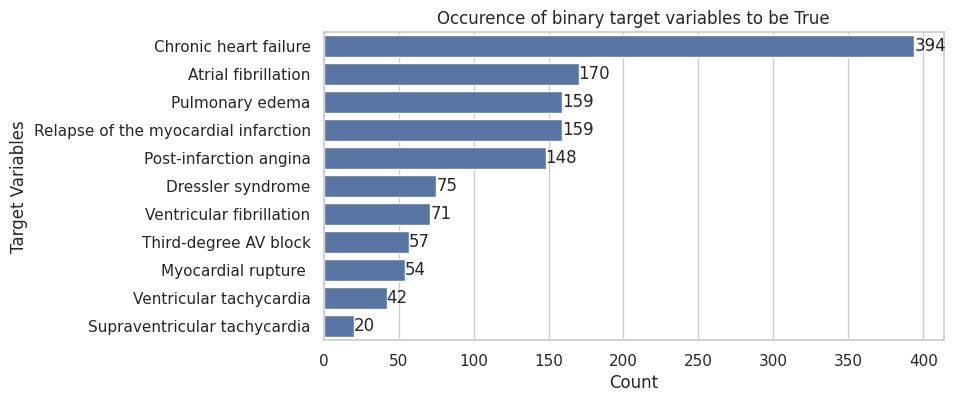

In [46]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 4))
data = mi_target_variables[mi_target_variables["type"].str.lower() == "binary"].sort_values(by="count", ascending=False)
ax = sns.barplot(x="count", y="description", data=data, orient="h")
ax.set_title("Occurence of binary target variables to be True")
ax.set_xlabel("Count")
ax.set_ylabel("Target Variables")
abs_values = data["count"].values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()

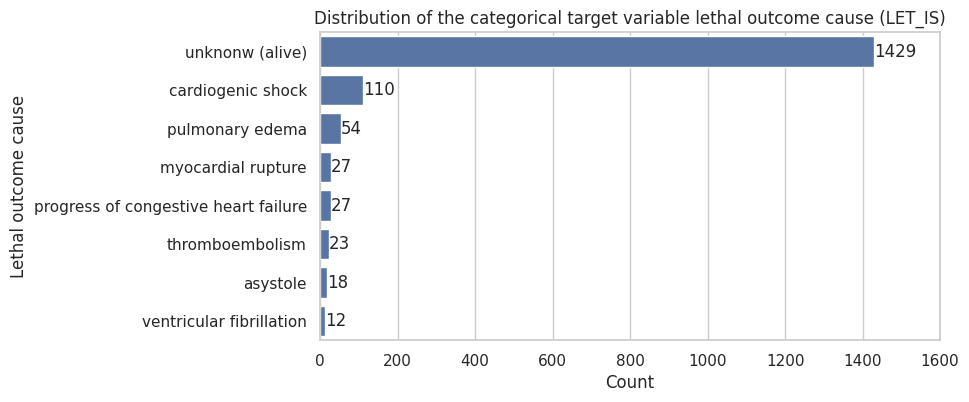

In [48]:
LET_IS_MAPPING = {
    0: "unknonw (alive)",
    1: "cardiogenic shock",
    2: "pulmonary edema",
    3: "myocardial rupture",
    4: "progress of congestive heart failure",
    5: "thromboembolism",
    6: "asystole",
    7: "ventricular fibrillation"
}
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=mi_targets, y='LET_IS', order=mi_targets['LET_IS'].value_counts().index)
ax.set_yticks(ticks=list(LET_IS_MAPPING.keys()), labels=list(LET_IS_MAPPING.values()), ha='right')
ax.set_title('Distribution of the categorical target variable lethal outcome cause (LET_IS)')
ax.set_ylabel('Lethal outcome cause')
ax.set_xlabel('Count')
ax.set_xlim(0, 1600)
abs_values = mi_targets['LET_IS'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=abs_values)
plt.show()


In [49]:
LET_IS_encoded = pd.get_dummies(mi_targets['LET_IS'], prefix='LET_IS')

In [50]:
LET_IS_encoded

,LET_IS_0,LET_IS_1,LET_IS_2,LET_IS_3,LET_IS_4,LET_IS_5,LET_IS_6,LET_IS_7
0,True,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
1695,False,False,False,True,False,False,False,False
1696,False,True,False,False,False,False,False,False
1697,False,False,False,False,False,False,True,False
1698,False,True,False,False,False,False,False,False


### Features

In [68]:
mi_feature_variables = mi_variables[mi_variables['role'].str.lower() == 'feature']
mi_feature_variables.set_index('name', inplace=True)

In [69]:
mi_feature_variables

,role,type,demographic,description,units,missing_values
name,,,,,,
AGE,Feature,Integer,Age,Age of patient.,NaN,no
SEX,Feature,Binary,Sex,"0: female, 1: male",NaN,no
INF_ANAM,Feature,Categorical,NaN,Quantity of myocardial infarctions in the anam...,NaN,yes
STENOK_AN,Feature,Categorical,NaN,Exertional angina pectoris in the anamnesis. \...,NaN,yes
FK_STENOK,Feature,Categorical,NaN,Functional class (FC) of angina pectoris in th...,NaN,yes
...,...,...,...,...,...,...
ANT_CA_S_n,Feature,Binary,NaN,Use of calcium channel blockers in the ICU,NaN,yes
GEPAR_S_n,Feature,Binary,NaN,Use of а anticoagulants (heparin) in the ICU,NaN,yes
ASP_S_n,Feature,Binary,NaN,Use of acetylsalicylic acid in the ICU,NaN,yes


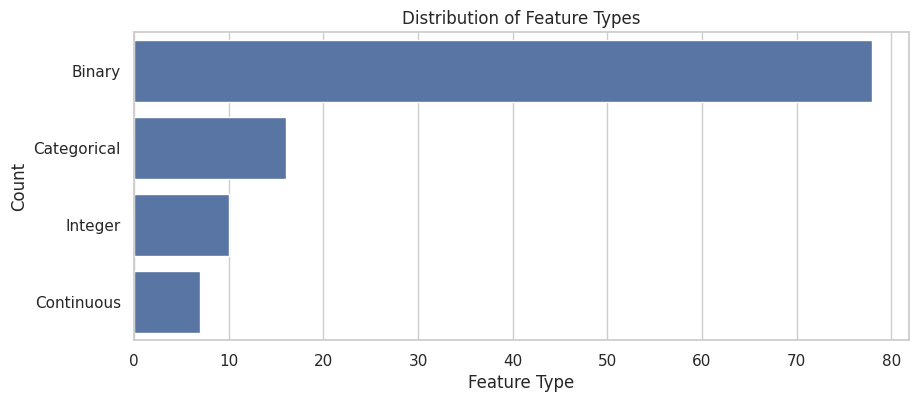

In [84]:
#label the boxes
fig, axs = plt.subplots(figsize=(10, 4))
sns.countplot(data=mi_feature_variables, y='type', ax=axs, order=mi_feature_variables['type'].value_counts().index)
axs.set_xlabel('Feature Type')
axs.set_ylabel('Count')
axs.set_title('Distribution of Feature Types')


plt.show()

In [75]:
mi_feature_variables['missing_values'].value_counts()["yes"]

np.int64(109)

In [71]:
mi_feature_variables[mi_feature_variables["type"] == "Continuous"]

,role,type,demographic,description,units,missing_values
name,,,,,,
K_BLOOD,Feature,Continuous,NaN,Serum potassium content,mmol/L,yes
NA_BLOOD,Feature,Continuous,NaN,Serum sodium content,mmol/L,yes
ALT_BLOOD,Feature,Continuous,NaN,Serum AlAT content (ALT_BLOOD),IU/L,yes
AST_BLOOD,Feature,Continuous,NaN,Serum AsAT content,IU/L,yes
KFK_BLOOD,Feature,Continuous,NaN,Serum CPK content,IU/L,yes
L_BLOOD,Feature,Continuous,NaN,White blood cell count,billions per liter,yes
ROE,Feature,Continuous,NaN,ESR (Erythrocyte sedimentation rate),мм,yes


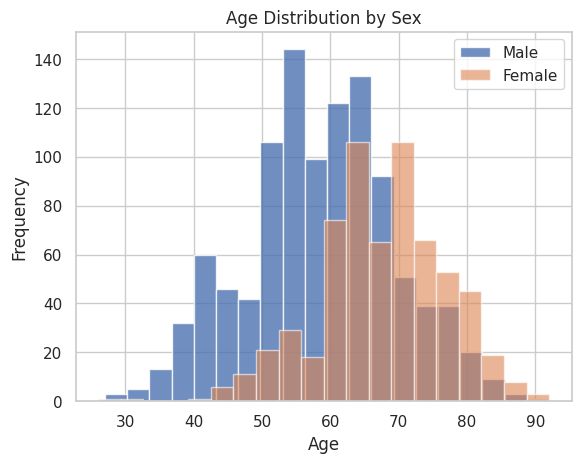

In [104]:
male_mean_age = mi_features[mi_features["SEX"] == 1]["AGE"].mean()
female_mean_age = mi_features[mi_features["SEX"] == 0]["AGE"].mean()
male_std_age = mi_features[mi_features["SEX"] == 1]["AGE"].std()
female_std_age = mi_features[mi_features["SEX"] == 0]["AGE"].std()
plt.hist(mi_features[mi_features["SEX"] == 1]["AGE"], label='Male', alpha=0.8, bins=20)
plt.hist(mi_features[mi_features["SEX"] == 0]["AGE"], label='Female', alpha=0.6, bins=20)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Sex')
plt.legend()

<Axes: xlabel='SEX', ylabel='count'>

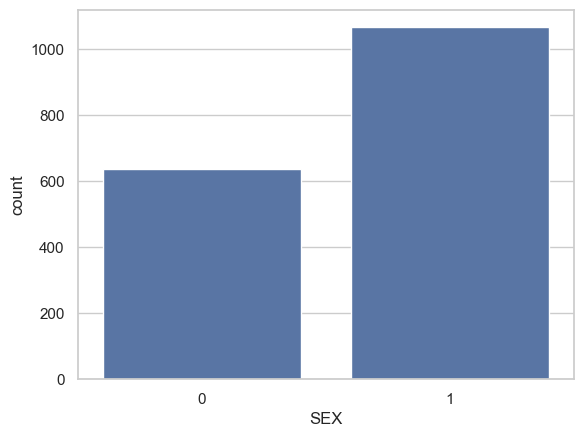

In [218]:
sns.countplot(data=mi_features, x='SEX')